In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [2]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df = pd.read_csv(r'C:\Airline data\mia_data.csv')

C:\Users\tucso\AppData\Local\Temp\ipykernel_5408\639176254.py:1: DtypeWarning: Columns (28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Airline data\mia_data.csv')


In [4]:
df.sample()

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,OP_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DEL15,DEP_DELAY_GROUP
223678,612,2016,2,6,22,3.0,6/22/2016 12:00:00 AM,1044,IAH,MIA,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
#These columns are not needed.

to_delete = ['ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'DEP_DEL15','DEP_DELAY_GROUP']
df.drop(to_delete, axis = 1, inplace = True)


In [6]:
df.keys()
df.drop('QUARTER', axis = 1, inplace = True)

In [7]:

df['WHY_DELAY']=''

In [8]:
df.keys()

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'OP_CARRIER', 'WHY_DELAY'],
      dtype='object')

In [9]:
#assiging value to WHY_DELAY column based on what caused the delay.

conditions = [df['CARRIER_DELAY']>0, df['WEATHER_DELAY']>0, df['NAS_DELAY']>0, df['SECURITY_DELAY']>0, df['LATE_AIRCRAFT_DELAY']>0]
choices = ['carrier', 'weather', 'nas', 'security', 'late aircraft']
df['WHY_DELAY'] = np.select(conditions, choices,)

In [10]:
#create bar graph based on why flights were delayed.
df.WHY_DELAY.value_counts().to_frame().style.bar()

,WHY_DELAY
0,573448
carrier,84593
nas,46935
weather,17749
late aircraft,13627
security,300


In [11]:
df.sample()

,Unnamed: 0,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,OP_CARRIER,WHY_DELAY
37520,71209,2012,5,10,4.0,5/10/2012 12:00:00 AM,3741,IAD,MIA,802,...,0.0,158.0,146.0,0.0,0.0,0.0,0.0,0.0,NaN,0


In [12]:
# Column FL_DATE time is wrong all times are set to midnight. I am going to get delete it to avoid further confusion.
df.drop('FL_DATE', axis = 1, inplace = True)

In [13]:
df.keys()

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'OP_CARRIER', 'WHY_DELAY'],
      dtype='object')

In [14]:
#Going to create DATE column by combining 'Year', 'Month', 'Day_of_Month'
df['DAY'] =df['DAY_OF_MONTH']


In [15]:
df['DATE']=pd.to_datetime(df[['YEAR', 'MONTH','DAY']])

In [16]:
df.drop('DAY_OF_MONTH', axis = 1, inplace = True)


In [17]:
df.keys()

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_FL_NUM',
       'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'OP_CARRIER', 'WHY_DELAY', 'DAY', 'DATE'],
      dtype='object')

In [18]:
#This column I want to convert to a time stamp. However, I am having problems because the data is not in the proper format.
df.CRS_ARR_TIME

0         1840
1         1840
2         1840
3         1840
4         1840
          ... 
736647    1016
736648      12
736649    1627
736650     955
736651    1538
Name: CRS_ARR_TIME, Length: 736652, dtype: int64

In [19]:
#This column I want to convert to a time stamp. However, I am having problems because the data is not in the proper format.
df.CRS_DEP_TIME

0         1535
1         1535
2         1535
3         1535
4         1535
          ... 
736647     725
736648    2225
736649    1346
736650     806
736651    1345
Name: CRS_DEP_TIME, Length: 736652, dtype: int64

In [20]:
import datetime as datetime
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)


In [21]:
df.head(10)

,Unnamed: 0,YEAR,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ACTUAL_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,OP_CARRIER,WHY_DELAY,DAY,DATE
0,459,2010,5,6.0,674,STT,MIA,1535,1519.0,-16.0,...,196.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1,2010-05-01
1,460,2010,5,7.0,674,STT,MIA,1535,1550.0,15.0,...,170.0,0.0,0.0,0.0,0.0,0.0,NaN,0,2,2010-05-02
2,461,2010,5,1.0,674,STT,MIA,1535,1550.0,15.0,...,176.0,0.0,0.0,0.0,0.0,0.0,NaN,0,3,2010-05-03
3,462,2010,5,2.0,674,STT,MIA,1535,1533.0,-2.0,...,176.0,0.0,0.0,0.0,0.0,0.0,NaN,0,4,2010-05-04
4,463,2010,5,3.0,674,STT,MIA,1535,1557.0,22.0,...,171.0,0.0,0.0,0.0,0.0,0.0,NaN,0,5,2010-05-05
5,464,2010,5,4.0,674,STT,MIA,1535,1605.0,30.0,...,166.0,0.0,0.0,0.0,0.0,0.0,NaN,0,6,2010-05-06
6,465,2010,5,5.0,674,STT,MIA,1535,1649.0,74.0,...,194.0,0.0,0.0,9.0,0.0,74.0,NaN,nas,7,2010-05-07
7,466,2010,5,6.0,674,STT,MIA,1535,1531.0,-4.0,...,196.0,0.0,0.0,0.0,0.0,0.0,NaN,0,8,2010-05-08
8,467,2010,5,7.0,674,STT,MIA,1535,1608.0,33.0,...,169.0,9.0,0.0,0.0,0.0,8.0,NaN,carrier,9,2010-05-09
9,468,2010,5,1.0,674,STT,MIA,1535,1531.0,-4.0,...,196.0,0.0,0.0,0.0,0.0,0.0,NaN,0,10,2010-05-10


In [22]:
df['DEPARTURE_TIME'] = df['CRS_DEP_TIME'].apply(format_heure)
df['ARRIVAL_TIME'] = df['CRS_ARR_TIME'].apply(format_heure)

In [23]:
df.head()

,Unnamed: 0,YEAR,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,OP_CARRIER,WHY_DELAY,DAY,DATE,DEPARTURE_TIME,ARRIVAL_TIME
0,459,2010,5,6.0,674,STT,MIA,1535,1519.0,-16.0,...,0.0,0.0,0.0,0.0,NaN,0,1,2010-05-01,15:35:00,18:40:00
1,460,2010,5,7.0,674,STT,MIA,1535,1550.0,15.0,...,0.0,0.0,0.0,0.0,NaN,0,2,2010-05-02,15:35:00,18:40:00
2,461,2010,5,1.0,674,STT,MIA,1535,1550.0,15.0,...,0.0,0.0,0.0,0.0,NaN,0,3,2010-05-03,15:35:00,18:40:00
3,462,2010,5,2.0,674,STT,MIA,1535,1533.0,-2.0,...,0.0,0.0,0.0,0.0,NaN,0,4,2010-05-04,15:35:00,18:40:00
4,463,2010,5,3.0,674,STT,MIA,1535,1557.0,22.0,...,0.0,0.0,0.0,0.0,NaN,0,5,2010-05-05,15:35:00,18:40:00


In [24]:
# Create a histogram of all delayed arrival flights regardless of reason.
df['ALL_LATE_ARR'] = df.query('ARR_DELAY_NEW > 0')["CRS_ARR_TIME"]

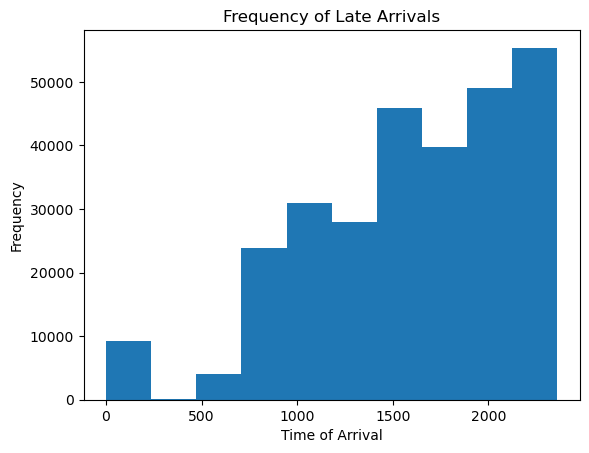

In [25]:
plt.hist(df.ALL_LATE_ARR)
plt.title('Frequency of Late Arrivals')
plt.xlabel('Time of Arrival')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Histogram of all delayed departure flights regardless of reason.
df['ALL_LATE_DEP'] = df.query('DEP_DELAY_NEW > 0')["CRS_DEP_TIME"]

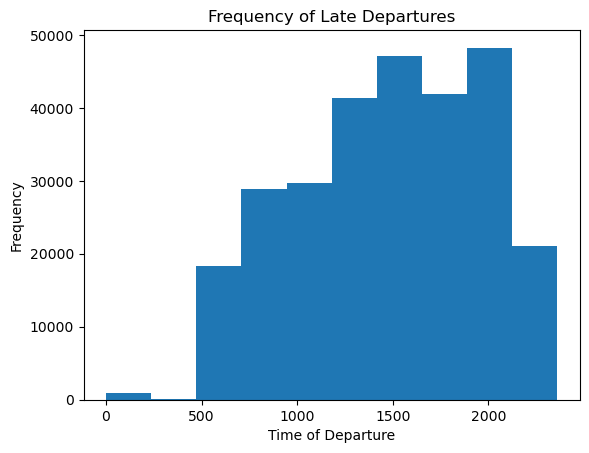

In [27]:
plt.hist(df.ALL_LATE_DEP)
plt.title('Frequency of Late Departures')
plt.xlabel('Time of Departure')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Calculating the average time a arrival was late by.
df_arr_mean = np.nanmean(df['ARR_DELAY_NEW'].values)

In [29]:
df_arr_mean

15.627575507628263

In [30]:
# Calculating the average time a departure was late by
df_dep_mean = np.nanmean(df['DEP_DELAY_NEW'])

In [31]:
df_dep_mean

14.91274191882681

In [32]:
# What time was the original arrival time for flights that were delayed by weather.
df['LATE_ARR'] = df.query('WHY_DELAY == "weather" & ARR_DELAY_NEW > 0')["CRS_ARR_TIME"]
df.LATE_ARR.describe()

count    17749.000000
mean      1770.003831
std        511.268421
min          1.000000
25%       1610.000000
50%       1850.000000
75%       2130.000000
max       2359.000000
Name: LATE_ARR, dtype: float64

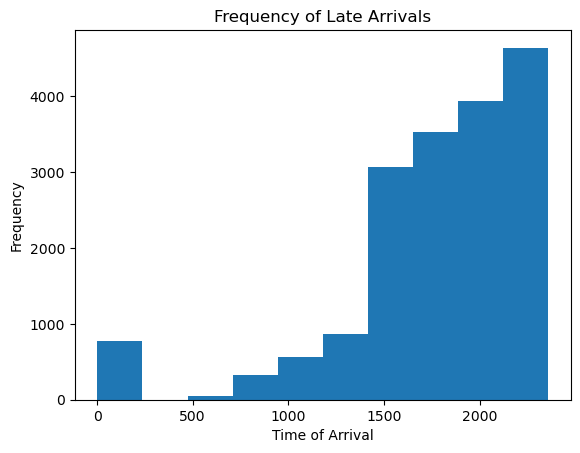

In [33]:
plt.hist(df.LATE_ARR)
plt.title('Frequency of Late Arrivals')
plt.xlabel('Time of Arrival')
plt.ylabel('Frequency')
plt.show()

In [34]:
#What time was the original departure time for flights that were delayed by weather.
df['LATE_DEP'] = df.query('WHY_DELAY == "weather" & DEP_DELAY_NEW > 0')["CRS_DEP_TIME"]

In [35]:
df.LATE_DEP.describe()

count    17749.000000
mean      1638.852724
std        367.605130
min          4.000000
25%       1410.000000
50%       1659.000000
75%       1935.000000
max       2359.000000
Name: LATE_DEP, dtype: float64

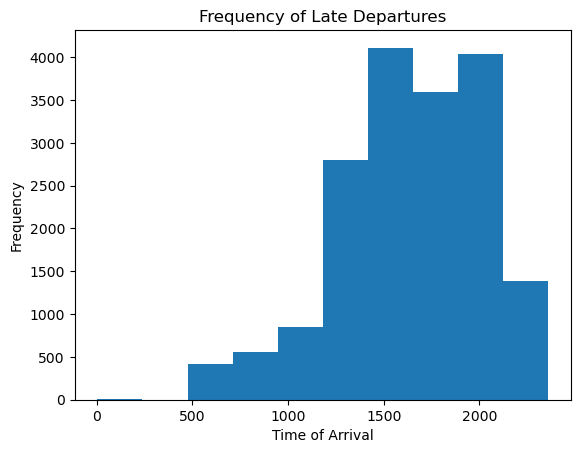

In [36]:
plt.hist(df.LATE_DEP)
plt.title('Frequency of Late Departures')
plt.xlabel('Time of Arrival')
plt.ylabel('Frequency')
plt.show()

In [37]:
df.LATE_ARR.unique()
#plt.scatter(x = df.LATE_ARR, y = df.LATE_ARR.value_counts())

array([  nan, 1055., 1510., ..., 1802., 2331., 1408.])

In [38]:
# which month of the year is the busiest for travel
df['MONTH'].value_counts()

#July is the busiest month for travel

7    154177
8    152211
5    147527
6    145887
9    136850
Name: MONTH, dtype: int64

In [39]:
# which time of the day is the busiest
df['DEP_TIME'].value_counts()
#5:56 Am is the most common departure time.
df.head()

,Unnamed: 0,YEAR,MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,OP_CARRIER,WHY_DELAY,DAY,DATE,DEPARTURE_TIME,ARRIVAL_TIME,ALL_LATE_ARR,ALL_LATE_DEP,LATE_ARR,LATE_DEP
0,459,2010,5,6.0,674,STT,MIA,1535,1519.0,-16.0,...,NaN,0,1,2010-05-01,15:35:00,18:40:00,NaN,NaN,NaN,NaN
1,460,2010,5,7.0,674,STT,MIA,1535,1550.0,15.0,...,NaN,0,2,2010-05-02,15:35:00,18:40:00,NaN,1535.0,NaN,NaN
2,461,2010,5,1.0,674,STT,MIA,1535,1550.0,15.0,...,NaN,0,3,2010-05-03,15:35:00,18:40:00,1840.0,1535.0,NaN,NaN
3,462,2010,5,2.0,674,STT,MIA,1535,1533.0,-2.0,...,NaN,0,4,2010-05-04,15:35:00,18:40:00,NaN,NaN,NaN,NaN
4,463,2010,5,3.0,674,STT,MIA,1535,1557.0,22.0,...,NaN,0,5,2010-05-05,15:35:00,18:40:00,1840.0,1535.0,NaN,NaN


In [40]:
# which carrier is the most notorious for delay
df_delayed = df[df['WHY_DELAY'] != '0']
df_delayed['OP_CARRIER'].value_counts()

AA    7260
MQ    2228
F9    1588
WN    1542
B6    1397
DL     964
UA     869
YV     103
YX      96
Name: OP_CARRIER, dtype: int64

In [44]:
df['OP_CARRIER'].value_counts()

AA    31174
MQ    10058
DL     6080
WN     5229
F9     4509
B6     3512
UA     3288
YX      454
YV      353
Name: OP_CARRIER, dtype: int64

In [45]:
print('American Airlines had more late flights than any other airline with 7260, Jet Blue had the most late flights in terms of percentage with 39.77%.')

American Airlines had more late flights than any other airline with 7260, Jet Blue had the most late flights in terms of percentage with 39.77%.


In [72]:
#which time of the day is more bound for cancellations.
df.keys()

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_FL_NUM',
       'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'OP_CARRIER', 'WHY_DELAY', 'DAY', 'DATE', 'DEPARTURE_TIME',
       'ARRIVAL_TIME', 'ALL_LATE_ARR', 'ALL_LATE_DEP', 'LATE_ARR', 'LATE_DEP'],
      dtype='object')

In [73]:
df_cancelled = df[df['CANCELLED'] == 1]

In [76]:
df_cancelled['DEP_TIME'].mean()

1472.3340292275575

In [77]:
df_cancelled['DEP_TIME'].mode()

0    1626.0
1    1628.0
Name: DEP_TIME, dtype: float64

In [78]:
df_cancelled['DEP_TIME'].median()

1534.0